The prediction has been done through a VotingEnsemble model which combines:
 - RobustScaler, ElasticNet (14,28%)
 - RobustScaler, ElasticNet (42,88%)
 - ProphetModel (21,42%)
 - Arimax (21,42%)


In [15]:
import json
import pandas as pd
import os

ruta_json = 'C:/Users/ignac/Desktop/202502PT/Proyecto final/Modelo prediccion/forecast_table.json'

if not os.path.exists(ruta_json):
    raise FileNotFoundError(f"Archivo no encontrado: {ruta_json}")

with open(ruta_json, 'r') as f:
    obj = json.load(f)

if 'data' not in obj:
    raise KeyError("El JSON no contiene la clave 'data'")

rows = []
for block in obj['data']:
    times = block.get('time', [[]])[0]
    y_true = block.get('y_true', [[]])[0]
    y_pred = block.get('y_pred', [[]])[0]
    lower = block.get('PI_lower_bound', [[]])[0]
    upper = block.get('PI_upper_bound', [[]])[0]
    
    for i, t in enumerate(times):
        rows.append({
            'fecha': pd.to_datetime(t),
            'y_true': y_true[i] if i < len(y_true) else None,
            'y_pred': y_pred[i] if i < len(y_pred) else None,
            'PI_lower': lower[i] if i < len(lower) else None,
            'PI_upper': upper[i] if i < len(upper) else None,
        })

df = pd.DataFrame(rows).sort_values('fecha').reset_index(drop=True)

# Guardar como CSV
ruta_csv = 'C:/Users/ignac/Desktop/202502PT/Proyecto final/Modelo prediccion/predicciones.csv'
df.to_csv(ruta_csv, index=False)

print(f"Predicciones guardadas en: {ruta_csv}")

Predicciones guardadas en: C:/Users/ignac/Desktop/202502PT/Proyecto final/Modelo prediccion/predicciones.csv


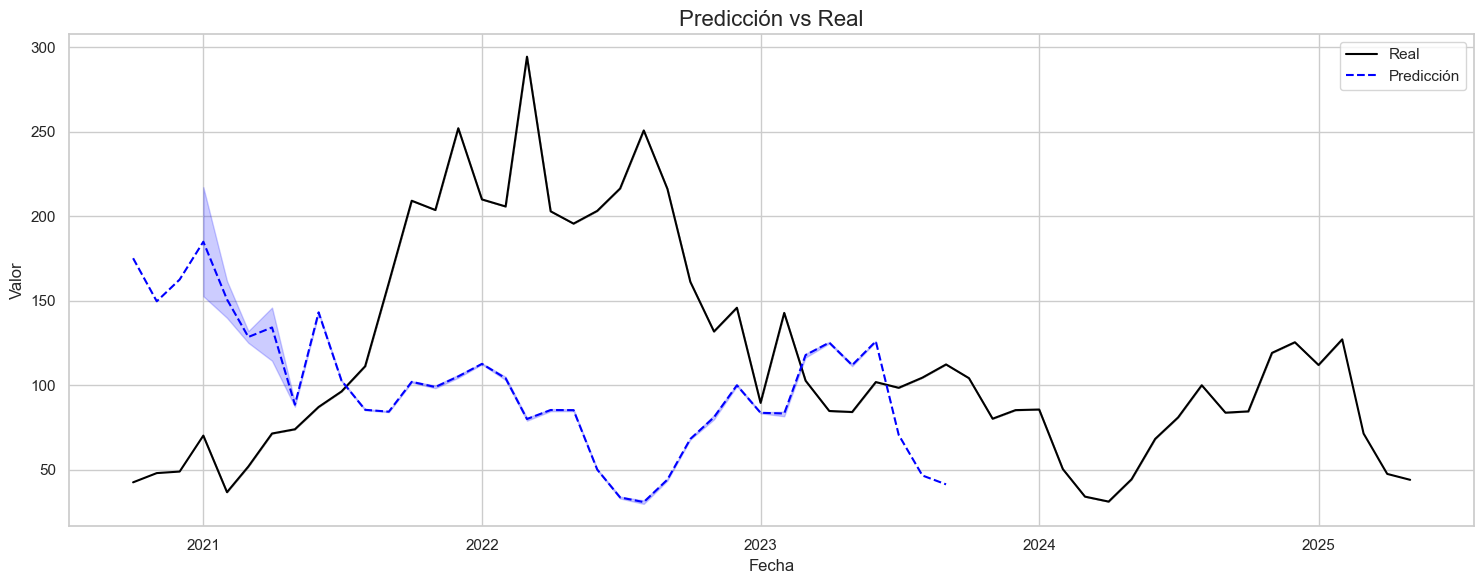

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Línea real
sns.lineplot(data=df, x='fecha', y='y_true', label='Real', color='black')

# Línea de predicción
sns.lineplot(data=df, x='fecha', y='y_pred', label='Predicción', linestyle='--', color='blue')

# Personalización
plt.title('Predicción vs Real', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()

We can easily see the prediction is not very accurate.

This is because there are a lot of factors that influence the electricity price, such as weather, the way it is generated, external factors, etc.

One clear example is in 2022 the Ukrainian war happened, which caused a lot of uncertainty in the market and therefore the price of electricity skyrocketed.